In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0324.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/abc270.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0360.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/abc296.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0295.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0551.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/abc293.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0590.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/nofire_0374.jpg
/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation/nofire/n

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2024-06-24 09:34:59.367694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 09:34:59.367785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 09:34:59.464256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("/kaggle/input/wildfire-detection-image-data/forest_fire/Training and Validation",
                                       target_size=(150,150),
                                       batch_size=32,
                                       class_mode='binary')







test_dataset=test.flow_from_directory("/kaggle/input/wildfire-detection-image-data/forest_fire/Testing",
                                     target_size=(150,150),
                                     batch_size=3,
                                     class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [5]:
model=keras.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history1=model.fit(train_dataset,epochs=13,validation_data=test_dataset)

Epoch 1/13


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/58 ━━━━━━━━━━━━━━━━━━━━ 9:03 10s/step - accuracy: 0.3125 - loss: 0.7031

I0000 00:00:1719221719.357876     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719221719.376769     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/58 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - accuracy: 0.5367 - loss: 0.8993

W0000 00:00:1719221723.775649     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7675 - loss: 0.5110

W0000 00:00:1719221731.093135     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.7694 - loss: 0.5075 - val_accuracy: 0.9265 - val_loss: 0.2301
Epoch 2/13


W0000 00:00:1719221732.205132     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9280 - loss: 0.1954 - val_accuracy: 0.8529 - val_loss: 0.3474
Epoch 3/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9558 - loss: 0.1358 - val_accuracy: 0.8676 - val_loss: 0.3071
Epoch 4/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9577 - loss: 0.1359 - val_accuracy: 0.9265 - val_loss: 0.2240
Epoch 5/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9699 - loss: 0.0968 - val_accuracy: 0.9412 - val_loss: 0.1803
Epoch 6/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9549 - loss: 0.1126 - val_accuracy: 0.8971 - val_loss: 0.2261
Epoch 7/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9706 - loss: 0.0954 - val_accuracy: 0.9265 - val_loss: 0.2493
Epoch 8/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9791 - loss: 0.0609 - val_accuracy: 0.9412 - val_loss: 0.1211
Epoch 9/13
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9799 - loss: 0.0613 - val_accuracy: 0.9853 - val_loss: 0.

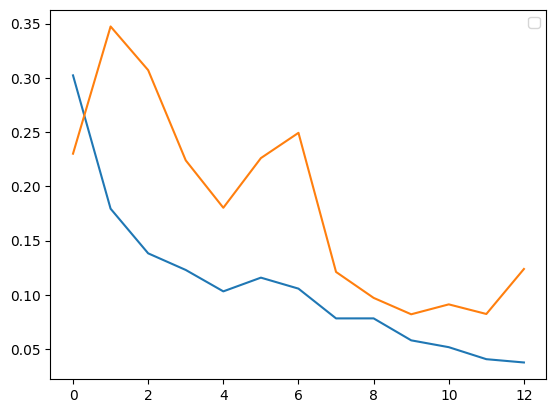

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend()
plt.show()

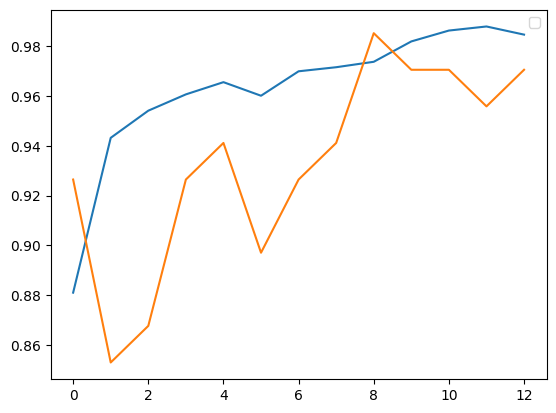

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend()
plt.show()

HENCE,our model is performing well there is no case of underfitting or overfitting

In [16]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [19]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [20]:
print(len(predictions))

68


In [21]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.]]


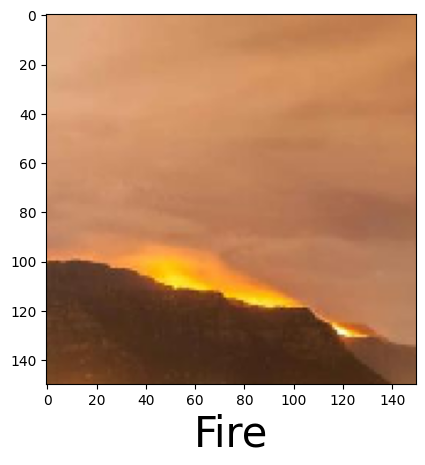

In [23]:
predictImage("/kaggle/input/wildfire-detection-image-data/forest_fire/Testing/fire/abc185.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.]]


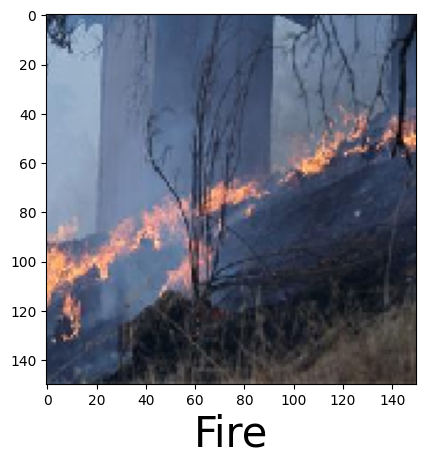

In [24]:
predictImage("/kaggle/input/wildfire-detection-image-data/forest_fire/Testing/fire/abc171.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.]]


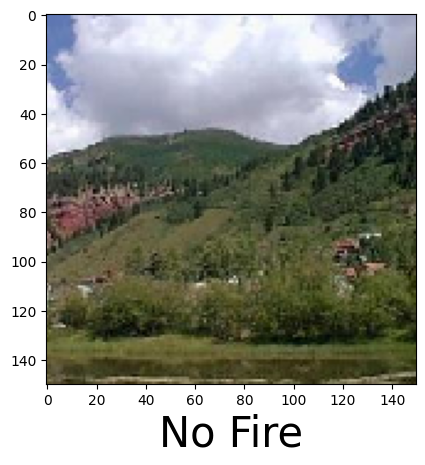

In [25]:
predictImage("/kaggle/input/wildfire-detection-image-data/forest_fire/Testing/nofire/abc346.jpg")

IMPROVEMENT
1. Can use earlystopping
2. Use Transfer Learning
3. Use keras tuning for the hyper parameter